# Gas Species

The `GasSpecies` module is designed to define and manage the characteristics of individual gas species within a mixture. This module is crucial for tracking concentrations and defining material properties of each species efficiently and effectively.

### Key Classes

This module primarily consists of two classes:

- **`GasSpecies`**: This class represents either an individual or an array of gas species. It includes properties such as the species' name, molar mass, vapor pressure, and whether it is condensable. The class provides methods to set and retrieve these properties, ensuring that each species is fully defined and manageable within simulations or calculations.

- **`GasSpeciesBuilder`**: This class is used to construct `GasSpecies` objects. It facilitates a step-by-step definition of all necessary properties before finalizing the object creation. This builder pattern helps in ensuring that all properties are correctly set and validated before a `GasSpecies` object is used in further calculations. It provides a fluent interface that enhances readability and ease of use in setting up gas species.

### Example Usage

We utilize the `GasSpeciesBuilder` to create instances of `GasSpecies`. This approach not only ensures that the species properties are well-defined but also verifies the integrity of the data before the object is finalized. The builder pattern is particularly useful in scenarios where a species must meet certain criteria or possess specific properties for accurate simulation and analysis.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Particula imports
from particula.next.vapor_pressure import vapor_pressure_factory
from particula.next.gas_species import GasSpecies, GasSpeciesBuilder

## Define Vapor Pressure Strategies

In this section, we'll focus on defining vapor pressure strategies for gas species, specifically Butanol, Styrene, and Water, which were used in our previous examples. To streamline our analysis, we will group Butanol and Styrene into a single organic category, and consider Water separately.

### Strategy Assignment

For calculating vapor pressures:

- **Organics (Butanol and Styrene)**: We will utilize the Antoine equation, a widely recognized method for estimating the vapor pressure of organic compounds based on temperature.
- **Water**: We will apply the Buck equation, which is specifically tailored to accurately calculate the vapor pressure of water across a range of temperatures.

In [34]:
# Define the coefficients for Butanol using the Antoine equation.
# 'a', 'b', and 'c' are coefficients specific to the Antoine equation used to calculate vapor pressure.
butanol_coefficients = {'a': 7.838, 'b': 1558.19, 'c': 196.881}
# Create a vapor pressure strategy for Butanol using the Antoine equation.
butanol_antione = vapor_pressure_factory(
    strategy='antoine', **butanol_coefficients)

# Define the coefficients for Styrene, similar to Butanol, using the
# Antoine equation.
styrene_coefficients = {'a': 6.924, 'b': 1420, 'c': 226}
# Create a vapor pressure strategy for Styrene using the Antoine equation.
styrene_antione = vapor_pressure_factory(
    strategy='antoine', **styrene_coefficients)

# Water uses a different model for vapor pressure calculation called the Buck equation.
# The Buck equation is particularly suited for water vapor calculations.
# No additional parameters are required to be passed for the Buck equation
# in this instance.
water_buck = vapor_pressure_factory(
    strategy='water_buck')

## Using `GasSpeciesBuilder` to Construct Gas Species

Now that we have defined the appropriate vapor pressure strategies for our gas species, we can proceed to construct the individual species using the `GasSpeciesBuilder`. This builder simplifies the process of defining and validating the properties of each gas species before their creation. We'll begin with Water, as it involves a straightforward application of the Buck equation.

### Building the Water Gas Species

The `GasSpeciesBuilder` facilitates a structured approach to setting up a gas species. To build a Water gas species, the builder requires the following properties to be set:

1. **Name**: Identifies the species, which in this case is "Water".
2. **Molar Mass**: The molar mass of water, essential for calculations involving mass and moles.
3. **Vapor Pressure Strategy**: The specific strategy used to calculate vapor pressure; for Water, we use the Buck equation.
4. **Condensability**: Indicates whether the species can condense under certain atmospheric conditions. For Water, this is typically true.
5. **Concentration**: The initial concentration of Water in the mixture, which could vary based on the scenario.

Here is how you can use the `GasSpeciesBuilder` to set up Water:

In [35]:
# Create an instance of GasSpeciesBuilder
water_builder = GasSpeciesBuilder()

# Configure the builder with the necessary properties
water_species = water_builder \
    .name("Water") \
    .molar_mass(0.01801528) \
    .vapor_pressure_strategy(water_buck) \
    .condensable(True) \
    .concentration(0.017) \
    .build()  # Finalize and create the GasSpecies object
# molar mass in kg/mol, concentration in kg/m3

### Building Gas Species for Organics

Following Water, you can apply a similar process to build gas species for Organics like Butanol and Styrene. Each will have its set of properties based on the chemical's nature and the desired simulation context.

When calling `.build()`, it checks that all required properties are set correctly, raising an error if any essential attribute is missing or improperly configured. This ensures that each `GasSpecies` instance is valid and ready usage.

In [36]:
# Define molar masses for organic species (Butanol and Styrene) in kilograms per mole (kg/mol).
organic_molar_mass = np.array([0.074121, 104.15e-3])  # Molar mass for Butanol and Styrene respectively.

# List of vapor pressure strategies assigned to each organic species.
organic_vapor_pressure = [butanol_antione, styrene_antione]  # Using Antoine's equation for both.

# Define concentrations for each organic species in the mixture, in kilograms per cubic meter (kg/m^3).
organic_concentration = np.array([2e-6, 1e-9])  # Concentration values for Butanol and Styrene respectively.

# Names of the organic species.
organic_names = np.array(["butanol", "styrene"])

# Using GasSpeciesBuilder to construct a GasSpecies object for organics.
# Notice how we can directly use arrays to set properties for multiple species.
organic_species = GasSpeciesBuilder() \
    .name(organic_names) \
    .molar_mass(organic_molar_mass) \
    .vapor_pressure_strategy(organic_vapor_pressure) \
    .condensable([True, True]) \
    .concentration(organic_concentration) \
    .build()  # Finalize and create the GasSpecies objects

# The `build()` method validates all the properties are set and returns the constructed GasSpecies object(s).
# Here, organic_species will contain the built GasSpecies instances for Butanol and Styrene.

## Pure Vapor Pressures

With the gas species defined, we can now calculate the pure vapor pressures of Butanol, Styrene, and Water using the respective strategies we assigned earlier. This will help us understand the vapor pressure behavior of each species individually, which is crucial for predicting their behavior in mixtures and under varying conditions.

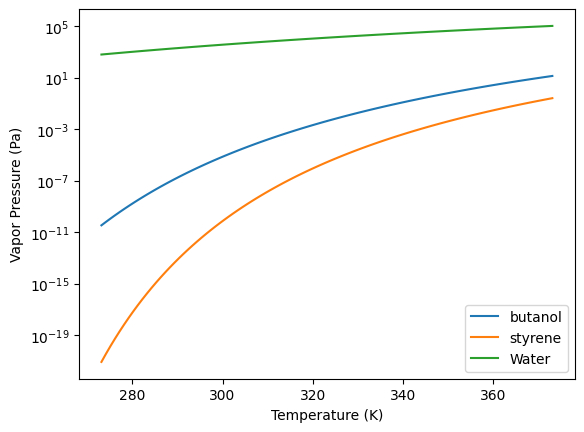

In [37]:
temperature_range = np.linspace(273.15, 373.15, 100)  # Temperature range from 0 to 100 degrees Celsius.

organic_pure_vapor_pressure = organic_species.get_pure_vapor_pressure(temperature_range)
water_pure_vapor_pressure = water_species.get_pure_vapor_pressure(temperature_range)

# Plotting the vapor pressure curves for the organic species.
fig, ax = plt.subplots()
for i in range(len(organic_names)):
    ax.plot(temperature_range, organic_pure_vapor_pressure[i], label=organic_names[i])
ax.plot(temperature_range, water_pure_vapor_pressure, label="Water")
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Vapor Pressure (Pa)")
ax.set_yscale('log')
ax.legend()
plt.show()

## Saturation Ratios

Now that we have established the concentration of each gas species within the mixture, we can proceed to calculate the saturation ratio for each species. The saturation ratio is an essential parameter in determining the condensation behavior of gas species within a mixture.

- **Above 1**: A saturation ratio greater than 1 indicates that the species is supersaturated and is likely to condense.
- **Below 1**: Conversely, a saturation ratio below 1 suggests that the species will likely remain in the gas phase.

### Future Exploration

In subsequent sections of this notebook series, we will delve deeper into how these saturation ratios reach equilibrium with a liquid phase, enhancing our understanding of the phase behavior under different conditions.

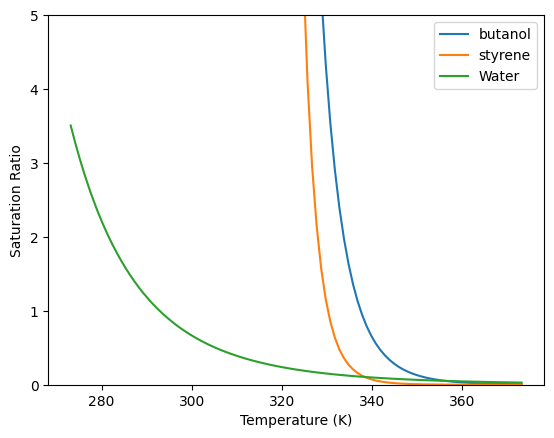

In [38]:
# Saturation ratio calculation
organic_saturation_ratio = organic_species.get_saturation_ratio(temperature_range)
water_saturation_ratio = water_species.get_saturation_ratio(temperature_range)

# Plotting the saturation ratio curves for the organic species.
fig, ax = plt.subplots()
for i in range(len(organic_names)):
    ax.plot(temperature_range, organic_saturation_ratio[i], label=organic_names[i])
ax.plot(temperature_range, water_saturation_ratio, label="Water")
ax.set_ylim(0, 5)
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Saturation Ratio")
ax.legend()
plt.show()


# Summary

The `GasSpecies` module, along with the `GasSpeciesBuilder`, provides a robust framework for defining and managing gas species within a mixture. By assigning specific vapor pressure strategies and other essential properties, we can accurately model the behavior of individual species and their interactions in various scenarios. This module serves as a foundational component for more advanced simulations and analyses involving gas mixtures, condensation, and phase equilibrium.

The next section is one more layer of abstraction, where we will define the `GasMixture` class to manage multiple gas species within a single mixture. This class will enable us to handle complex gas mixtures effectively and efficiently, paving the way particle to gas interactions.

# Help Calls

Below are the help calls for the `GasSpecies` and `GasSpeciesBuilder` classes, which provide detailed information on their properties and methods for further exploration and understanding.

In [31]:
help(GasSpeciesBuilder)

Help on class GasSpeciesBuilder in module particula.next.gas_species:

class GasSpeciesBuilder(builtins.object)
 |  Builder class for GasSpecies objects, allowing for a more fluent and
 |  readable creation of GasSpecies instances with optional parameters.
 |  
 |  Methods:
 |  - name: Set the name of the gas species.
 |  - molar_mass: Set the molar mass of the gas species.
 |  - vapor_pressure_strategy: Set the vapor pressure strategy for the gas
 |      species.
 |  - condensable: Set the condensable property of the gas species.
 |  - build: Validate and return the GasSpecies object.
 |  
 |  Returns:
 |  - GasSpecies: The built GasSpecies object.
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  build(self) -> particula.next.gas_species.GasSpecies
 |      Validate and return the GasSpecies object.
 |  
 |  concentration(self, concentration: Union[float, numpy.ndarray[Any, numpy.dtype[numpy.float64]]

In [32]:
help(GasSpecies)

Help on class GasSpecies in module particula.next.gas_species:

class GasSpecies(builtins.object)
 |  GasSpecies represents an individual or array of gas species with
 |  properties like name, molar mass, vapor pressure, and condensability.
 |  
 |  Attributes:
 |  - name (str): The name of the gas species.
 |  - molar_mass (float): The molar mass of the gas species.
 |  - pure_vapor_pressure_strategy (VaporPressureStrategy): The strategy for
 |      calculating the pure vapor pressure of the gas species.
 |  - condensable (bool): Indicates whether the gas species is condensable.
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self)
 |      Return a string representation of the GasSpecies object.
 |  
 |  get_concentration(self) -> Union[float, numpy.ndarray[Any, numpy.dtype[numpy.float64]]]
 |      Get the concentration of the gas species in the mixture, in kg/m^3.
 |      
 |      Returns:
